<a href="https://colab.research.google.com/github/makshi30/Telecom_Industry-Direct-Marketing/blob/main/Telecom_Industry_Direct_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [29]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split

In [30]:
#train= pd.read_excel('/content/drive/MyDrive/Telecom Industry- Direct Marketing/Train Data.xlsx')  
#age column discrepancy
train=pd.read_excel('/content/drive/MyDrive/Telecom Industry- Direct Marketing/Validate Data.xlsx')
test= pd.read_excel('/content/drive/MyDrive/Telecom Industry- Direct Marketing/Test Data.xlsx')

**Data Structure**

•	connect: has more than one connection? 

•	balance: voice credit balance 

•	landline: has landline? 

•	smart: has smart phone?  

•	last_day: last contact day of the month 

•	last_month: last contact month of year 

•	duration: last contact duration, in seconds 

•	campaign: number of contacts performed during this 
campaign includes last contact

•	passdays: number of days that passed by after the customer was last contacted from a previous campaign (-1 means client was not previously contacted)

•	previous: number of contacts performed before this campaign 

•	poutcome: outcome of the previous marketing campaign 

•	target: has the customer subscribed a data pack? (binary: "1","0")


In [31]:
train.head()

,age,job,marital,education,connect,balance,landline,smart,last_day,last_month,duration,campaign,passdays,previous,poutcome,target
0,30,unemployed,married,primary,no,1787,no,no,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,5,may,226,1,-1,0,unknown,0


In [32]:
train.shape

(4521, 16)

# **EDA**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


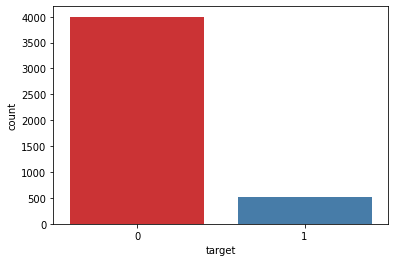

In [33]:
sns.countplot(train['target'], palette='Set1')

In [34]:
count_no_sub = len(train[train['target']==0])
count_sub = len(train[train['target']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 88.47600088476001
percentage of subscription 11.523999115239992


**Note**: The output column (target) is imbalanced. The ratio of people buying the pack to people not buying is 88:11

Text(0.5, 1.0, 'Age Distribution')

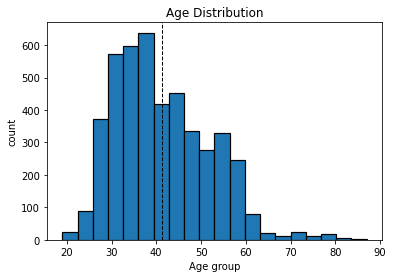

In [35]:
plt.hist( train['age'], bins=20, edgecolor='black', linewidth=1.2 )
plt.axvline(train['age'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.xlabel('Age group')
plt.ylabel('count')
plt.title('Age Distribution')

Dotted line represents the mean of the age of the customers in the dataset. Majority of the customers falls in the 30-40 age group.

Text(0.5, 1.0, 'Age Boxplot')

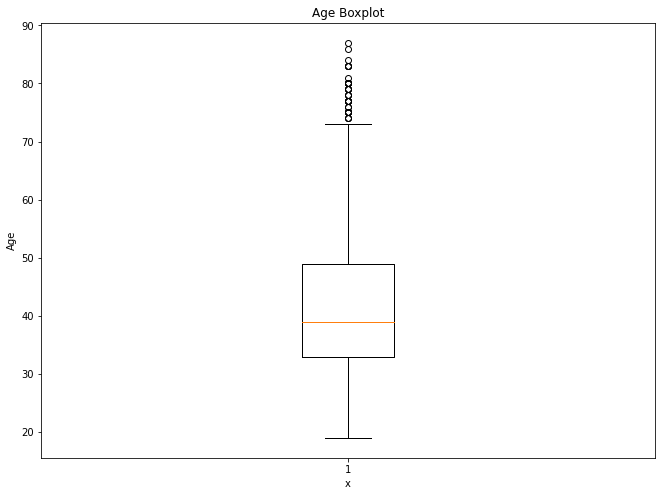

In [36]:
plt.figure(figsize=(11, 8))
plt.boxplot(train['age'])
plt.xlabel('x')
plt.ylabel('Age')
plt.title('Age Boxplot')


The above boxplot shows that there are very few customers with age of 75 years. These are the outliers.

In [37]:
train.groupby('target').mean()

,age,balance,last_day,duration,campaign,passdays,previous
target,,,,,,,
0,40.998000,1403.211750,15.948750,226.347500,2.862250,36.006000,0.471250
1,42.491363,1571.955854,15.658349,552.742802,2.266795,68.639155,1.090211


1. The average age of customers who bought the datapack is higher than that of the customers who didn’t.
2. Campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the data pack.

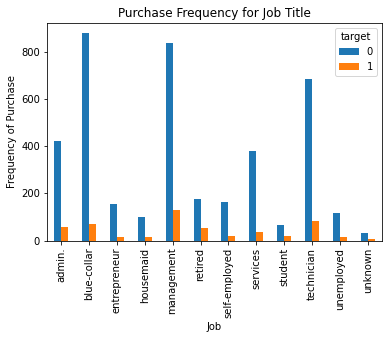

In [38]:
%matplotlib inline
pd.crosstab(train.job,train.target).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

Text(0, 0.5, 'Proportion of Customers')

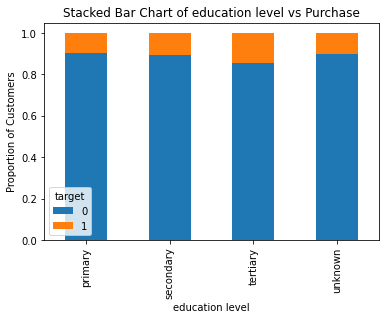

In [56]:
table=pd.crosstab(train.education,train.target)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of education level vs Purchase')
plt.xlabel('education level')
plt.ylabel('Proportion of Customers')


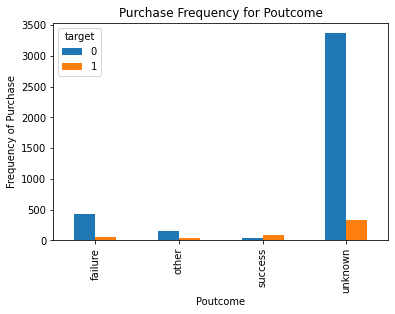

In [40]:
pd.crosstab(train.poutcome,train.target).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

# **Data Preparation**

### One-hot encoding

In [41]:
dummy = train.copy()
dummy = pd.get_dummies(dummy, columns=['job','marital','education','connect','last_month','poutcome'])#, prefix = ['carrier'])

print(dummy.head())

   age  balance landline  ... poutcome_other  poutcome_success  poutcome_unknown
0   30     1787       no  ...              0                 0                 1
1   33     4789      yes  ...              0                 0                 0
2   35     1350      yes  ...              0                 0                 0
3   30     1476      yes  ...              0                 0                 1
4   59        0      yes  ...              0                 0                 1

[5 rows x 47 columns]


In [42]:
del dummy['landline']
del dummy['smart']

In [43]:
dummy.columns.values

array(['age', 'balance', 'last_day', 'duration', 'campaign', 'passdays',
       'previous', 'target', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'connect_no', 'connect_yes', 'last_month_apr',
       'last_month_aug', 'last_month_dec', 'last_month_feb',
       'last_month_jan', 'last_month_jul', 'last_month_jun',
       'last_month_mar', 'last_month_may', 'last_month_nov',
       'last_month_oct', 'last_month_sep', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype=object)

## SMOTE

**Note:** Up-Sampling the no-subscription using the **SMOTE** algorithm(Synthetic Minority Oversampling Technique)

In [44]:
X = dummy.loc[:, dummy.columns != 'target']
y = dummy.loc[:, dummy.columns == 'target']

In [45]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['target'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['target']==0]))
print("Number of subscription",len(os_data_y[os_data_y['target']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['target']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['target']==1])/len(os_data_X))

length of oversampled data is  5620
Number of no subscription in oversampled data 2810
Number of subscription 2810
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


## RFE

In [46]:
data_final= dummy.columns.values.tolist()
y=['target']
X=[i for i in data_final if i not in y]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[False False False False False False False  True  True  True  True  True
 False  True  True  True  True  True False  True  True  True  True  True
  True  True False False False False False False False False False False
 False False False False  True  True False  True]
[21 25 24 22 19 23 20  1  1  1  1  1  2  1  1  1  1  1  3  1  1  1  1  1
  1  1 17 18 11  9 13 10  4  8  5 15  6  7 14 12  1  1 16  1]


In [47]:
#removed columns with 'False' output, index starting from 1
cols= [  'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 
       'last_month_oct', 'last_month_sep', 'poutcome_failure',
       'poutcome_other']
      
X=os_data_X[cols]
y=os_data_y['target']

# **Model Implementation**

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.524933
         Iterations 7
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.243    
Dependent Variable:   target            AIC:               5942.2501
Date:                 2020-11-24 09:18  BIC:               6081.5659
No. Observations:     5620              Log-Likelihood:    -2950.1  
Df Model:             20                LL-Null:           -3895.5  
Df Residuals:         5599              LLR p-value:       0.0000   
Converged:            1.0000            Scale:             1.0000   
No. Iterations:       7.0000                                        
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
job_admin.          -3.2007   0.1744 -18.3560 0.0000 -3.5424 -2.8589
job_blue-collar     -3.3719 

**Note:** Removing columns with P(value) < 0.05

In [50]:
cols= [  'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single', 'education_secondary', 
       'last_month_oct', 'last_month_sep']
X=os_data_X[cols]
y=os_data_y['target']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.525337
         Iterations 7
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.242    
Dependent Variable:   target            AIC:               5940.7933
Date:                 2020-11-24 09:18  BIC:               6060.2069
No. Observations:     5620              Log-Likelihood:    -2952.4  
Df Model:             17                LL-Null:           -3895.5  
Df Residuals:         5602              LLR p-value:       0.0000   
Converged:            1.0000            Scale:             1.0000   
No. Iterations:       7.0000                                        
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
job_admin.          -3.2380   0.1734 -18.6710 0.0000 -3.5779 -2.8981
job_blue-collar     -3.4696 

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.91


In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[839   2]
 [154 691]]


**Interpretation:**
The result is telling us that we have (839 + 691) correct predictions and (2 + 154) incorrect predictions.

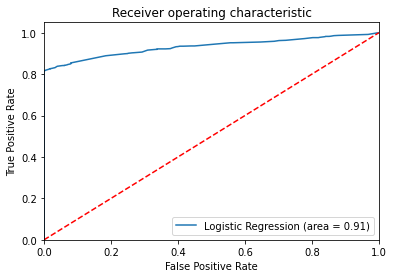

In [55]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

**Note:** The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).